In [69]:
import tweepy #to get twitter data
from textblob import TextBlob #to get sentimentents
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [2]:
#Twitter API Credentials
APIkey = "hxKUjgXyIBEiDuq07A2QukNPG"
APISecretKey = "HxMhFHqyMvSiRt6y1XKGpPraBDso4VMTNZ8RykvC3vQdXDUNx8"
accessToken = "1198878557658763265-SkARa9ZAjrItJgprR1MLcmtBxWbO4M"
accessTokenSecret = "2z9JM84GLzTNflrCXUDluDDd9kBJRKT0Aj88685ImTwSa"

In [3]:
#Authentication Object
authenticate = tweepy.OAuthHandler(APIkey,APISecretKey)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate)

In [46]:
posts = api.user_timeline(screen_name='Trump', count=100, lang="en", tweet_mode = 'extended')

In [47]:
posts

[Status(_api=<tweepy.api.API object at 0x7f89e732cb20>, _json={'created_at': 'Sat Aug 07 18:34:40 +0000 2021', 'id': 1424076542783770630, 'id_str': '1424076542783770630', 'full_text': 'A\xa0stunning landmark of the Ayrshire coastline since 1873, our legendary Turnberry Lighthouse stands today as both a\xa0luxury Scottish cottage and "World\'s Best Halfway House." #NationalLighthouseDay https://t.co/5aV7PSOHOY', 'truncated': False, 'display_text_range': [0, 196], 'entities': {'hashtags': [{'text': 'NationalLighthouseDay', 'indices': [174, 196]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1424076538664869893, 'id_str': '1424076538664869893', 'indices': [197, 220], 'media_url': 'http://pbs.twimg.com/media/E8NWERwWYAU77xJ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/E8NWERwWYAU77xJ.jpg', 'url': 'https://t.co/5aV7PSOHOY', 'display_url': 'pic.twitter.com/5aV7PSOHOY', 'expanded_url': 'https://twitter.com/Trump/status/1424076542783770630/photo/1', 'type': 'photo

In [48]:
i=1
for tweet in posts[:10]:
    print(str(i)+') ' + tweet.full_text + '\n')
    i+=1

1) A stunning landmark of the Ayrshire coastline since 1873, our legendary Turnberry Lighthouse stands today as both a luxury Scottish cottage and "World's Best Halfway House." #NationalLighthouseDay https://t.co/5aV7PSOHOY

2) Celebrating #InternationalBeerDay with sweeping Pacific Ocean views and refreshing coastal cuisine.🌊 https://t.co/F7ovt9kPEp

3) A luxury hotel legend and our CEO of @TrumpHotels, Eric Danziger, was recently featured on the Mary Gostelow Girlahead Podcast. Listen now at https://t.co/JNka5CBw67. https://t.co/l2LavxXC43

4) A luxury public golf experience awaits you from coast to coast. Which one of our @TrumpGolf courses will you play this #NationalGolfMonth: @TrumpGolfLA, @TrumpFerryPoint, or @TrumpDoral?⛳️ https://t.co/qEojxjI8RH

5) The @TrumpStore has a summer surprise–Christmas in July! Enjoy savings up to 75% before 7/31. https://t.co/zPIEGtVwSh https://t.co/CArAqiNR2j

6) A wee dram is a must during any visit to our famed Clavis Whisky Bar at @TrumpScotlan

In [49]:
#create dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

In [50]:
df

,Tweets
0,A stunning landmark of the Ayrshire coastline ...
1,Celebrating #InternationalBeerDay with sweepin...
2,A luxury hotel legend and our CEO of @TrumpHot...
3,A luxury public golf experience awaits you fro...
4,The @TrumpStore has a summer surprise–Christma...
...,...
95,Luxury golf meets lush accommodations. Stay an...
96,"RT @EricTrump: In less than a week, @TrumpStor..."
97,"Wishing you all a bright, healthy and Happy Ne..."
98,Enjoy 15% off digital gift card orders of $100...


In [55]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0-9]+','',text) #remove unwanted characrers
    text = re.sub("#",'',text) #remove '#'
    text = re.sub('RT[\s]+','', text) #removing retweets
    text = re.sub('https?:\/\/\S+','',text)
    return text

In [56]:
df['Tweets']=df['Tweets'].apply(cleanTxt)

In [57]:
df

,Tweets
0,A stunning landmark of the Ayrshire coastline ...
1,Celebrating InternationalBeerDay with sweeping...
2,"A luxury hotel legend and our CEO of , Eric Da..."
3,A luxury public golf experience awaits you fro...
4,The has a summer surprise–Christmas in July! ...
...,...
95,Luxury golf meets lush accommodations. Stay an...
96,": In less than a week, is back online and rea..."
97,"Wishing you all a bright, healthy and Happy Ne..."
98,Enjoy 15% off digital gift card orders of $100...


In [58]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [60]:
df['Polarity']=df['Tweets'].apply(getPolarity)

In [66]:
df

,Tweets,Polarity
0,A stunning landmark of the Ayrshire coastline ...,0.833333
1,Celebrating InternationalBeerDay with sweeping...,0.500000
2,"A luxury hotel legend and our CEO of , Eric Da...",0.000000
3,A luxury public golf experience awaits you fro...,0.000000
4,The has a summer surprise–Christmas in July! ...,0.400000
...,...,...
95,Luxury golf meets lush accommodations. Stay an...,0.100000
96,": In less than a week, is back online and rea...",0.276667
97,"Wishing you all a bright, healthy and Happy Ne...",0.542614
98,Enjoy 15% off digital gift card orders of $100...,0.256250


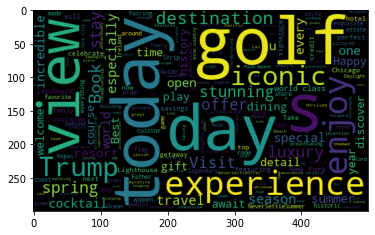

In [74]:
allwords = ' '.join([i for i in df['Tweets']])
Cloud = WordCloud(width=500, height=300,random_state=0,max_font_size=100).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [75]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)

In [80]:
df

,Tweets,Polarity,Analysis
0,A stunning landmark of the Ayrshire coastline ...,0.833333,Positive
1,Celebrating InternationalBeerDay with sweeping...,0.500000,Positive
2,"A luxury hotel legend and our CEO of , Eric Da...",0.000000,Neutral
3,A luxury public golf experience awaits you fro...,0.000000,Neutral
4,The has a summer surprise–Christmas in July! ...,0.400000,Positive
...,...,...,...
95,Luxury golf meets lush accommodations. Stay an...,0.100000,Positive
96,": In less than a week, is back online and rea...",0.276667,Positive
97,"Wishing you all a bright, healthy and Happy Ne...",0.542614,Positive
98,Enjoy 15% off digital gift card orders of $100...,0.256250,Positive


In [81]:
df['Analysis'].value_counts()

Positive    81
Neutral     16
Negative     3
Name: Analysis, dtype: int64

In [82]:
df.shape

(100, 3)

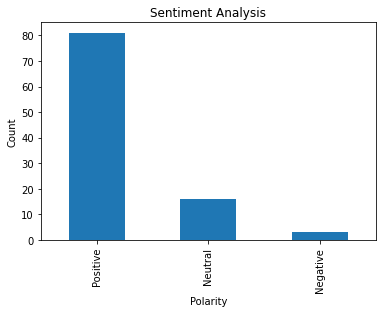

In [84]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()